# Loading packages

In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from pandas.api.types import CategoricalDtype

# Loading data

In [4]:
data= pd.read_pickle("../data/modified_exclusions/pt_replication_modified_exclusions_data.pkl")

In [5]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,Loss_Intuition,Country,Duration_in_seconds,Language,Sample,Duration_Minutes,YoB,Awareness_of_Loss_Aversion,Financial_Stress,Presentation_Order
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,Bulgaria,356,Bulgarian,Direct,5.933333,1992,3,NaN,4|6|2|3|17|18|14|8|7|15|1|12|11|5|13|16|9|10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,Bulgaria,931,Bulgarian,Direct,15.516667,1979,1,NaN,7|17|16|11|15|18|4|9|1|13|2|10|6|14|5|12|8|3
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,Bulgaria,462,Bulgarian,Direct,7.700000,1975,3,NaN,11|8|4|7|12|18|3|14|6|16|17|1|2|13|5|15|9|10
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,Bulgaria,412,Bulgarian,Direct,6.866667,1977,1,NaN,16|7|6|9|12|18|10|8|5|15|2|3|4|14|11|1|17|13
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,Bulgaria,490,Bulgarian,Direct,8.166667,1970,1,NaN,13|4|3|7|9|18|16|8|14|1|6|12|17|10|5|2|11|15


# Sample overview

In [6]:
sample_size_df = pd.DataFrame(data["Country"].value_counts())
sample_size_df.columns = ["Total n"]

In [7]:
sample_size_df["Direct n"] = data.loc[data["Sample"]=="Direct", "Country"].value_counts()
sample_size_df["Paid n"] = data.loc[data["Sample"]=="Paid", "Country"].value_counts()

In [8]:
sample_size_df.loc[sample_size_df["Paid n"].notna(), "Paid n"] = sample_size_df.loc[
    sample_size_df["Paid n"].notna(), "Paid n"].round()
sample_size_df = sample_size_df.loc[:, ["Direct n", "Paid n", "Total n"]]
sample_size_df.to_excel("../output/Sample Size.xlsx")
sample_size_df.to_csv("../output/Sample Size.csv")

# Creating long format data frames

### Create a vector of original PT proportions

In [9]:
original_pt_proportions = pd.Series([0.18, 0.83, 0.20, 0.65, 0.14, 0.73, 0.92, 0.42, 0.92, 0.30, 0.22, 0.16, 0.69, 0.18, 0.70, 0.72, 0.17],
                                   index=[str(i) for i in np.arange(1, 18)])
original_pt_proportions

1     0.18
2     0.83
3     0.20
4     0.65
5     0.14
6     0.73
7     0.92
8     0.42
9     0.92
10    0.30
11    0.22
12    0.16
13    0.69
14    0.18
15    0.70
16    0.72
17    0.17
dtype: float64

# Create a dataframe for original PT Proportions

In [64]:
original_pt_proportions_df = pd.DataFrame(original_pt_proportions)
original_pt_proportions_df = original_pt_proportions_df.reset_index()
original_pt_proportions_df.columns = ["Item", "Proportion"]
original_pt_proportions_df["Item"] = original_pt_proportions_df["Item"].astype(str)
original_pt_proportions_df["Country"] = "Original"
original_pt_proportions_df.to_csv("../output/original_proportions.csv", index=False)

### Pivoting the replication data to a long format with response proportions per item per country

In [11]:
long_data = data.groupby("Country")[[str(i) for i in np.arange(1, 18)]].mean().reset_index().melt(id_vars="Country", value_vars=[str(i) for i in np.arange(1, 18)],
                                                                                   var_name="Item", value_name="Proportion")

### Creating dataframe combining proportions from the replication and the original

In [12]:
long_data_combinded = pd.concat([long_data, original_pt_proportions_df], ignore_index=True, sort=True)

In [13]:
long_data_combinded.tail()

,Country,Item,Proportion
335,Original,13,0.69
336,Original,14,0.18
337,Original,15,0.70
338,Original,16,0.72
339,Original,17,0.17


# Data wrangling with the proportions

### Create wide dataframe with response proportion per item per country

In [14]:
country_proportions = data.groupby("Country")[[str(i) for i in np.arange(1, 18)]].mean()
country_proportions.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Country,,,,,,,,,,,,,,,,,
Australia,0.446809,0.705674,0.152482,0.524823,0.095745,0.673759,0.695035,0.432624,0.815603,0.340426,0.145390,0.262411,0.528369,0.158915,0.557554,0.634752,0.365248
Austria,0.198198,0.549550,0.090090,0.414414,0.126126,0.657658,0.828829,0.459459,0.810811,0.378378,0.081081,0.189189,0.621622,0.144144,0.648649,0.558559,0.441441
Belgium,0.192708,0.645833,0.125000,0.489583,0.072917,0.656250,0.833333,0.510417,0.828125,0.380208,0.135417,0.276042,0.651042,0.267016,0.638743,0.463542,0.442708
Bulgaria,0.181102,0.566929,0.118110,0.511811,0.125984,0.645669,0.858268,0.598425,0.811024,0.559055,0.165354,0.267717,0.653543,0.204724,0.645669,0.622047,0.606299
Chile,0.186207,0.565517,0.103448,0.475862,0.096552,0.606897,0.827586,0.558621,0.772414,0.503448,0.165517,0.165517,0.703448,0.103448,0.648276,0.448276,0.537931


### check the extent to which the current proportion of A choices deviate from the original study

In [15]:
country_deviations = country_proportions - original_pt_proportions
country_deviations.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Country,,,,,,,,,,,,,,,,,
Australia,0.266809,-0.124326,-0.047518,-0.125177,-0.044255,-0.056241,-0.224965,0.012624,-0.104397,0.040426,-0.074610,0.102411,-0.161631,-0.021085,-0.142446,-0.085248,0.195248
Austria,0.018198,-0.280450,-0.109910,-0.235586,-0.013874,-0.072342,-0.091171,0.039459,-0.109189,0.078378,-0.138919,0.029189,-0.068378,-0.035856,-0.051351,-0.161441,0.271441
Belgium,0.012708,-0.184167,-0.075000,-0.160417,-0.067083,-0.073750,-0.086667,0.090417,-0.091875,0.080208,-0.084583,0.116042,-0.038958,0.087016,-0.061257,-0.256458,0.272708
Bulgaria,0.001102,-0.263071,-0.081890,-0.138189,-0.014016,-0.084331,-0.061732,0.178425,-0.108976,0.259055,-0.054646,0.107717,-0.036457,0.024724,-0.054331,-0.097953,0.436299
Chile,0.006207,-0.264483,-0.096552,-0.174138,-0.043448,-0.123103,-0.092414,0.138621,-0.147586,0.203448,-0.054483,0.005517,0.013448,-0.076552,-0.051724,-0.271724,0.367931


### Quantify how far the original PT proportions were from a 50-50 split

In [16]:
original_pt_distance_from_indifference = original_pt_proportions - 0.5

### Transform the difference in proportion to a difference in effect size, accounting for whether the majority chose option A in the original study. I.e. if the original proportion was less than 0.5 an increase in proportion is treated as decrease in effect and vice versa.

In [17]:
country_deviations_signed = country_deviations.copy()
for col in country_deviations:
    if original_pt_distance_from_indifference[col] < 0:
        country_deviations_signed[col] = country_deviations_signed[col]*-1

# Comparing differences in effect size from the original between countries and between Items

In [18]:
country_deviations_signed.mean(1).sort_values()

Country
Slovenia         -0.109071
Serbia           -0.103812
Bulgaria         -0.100107
Mainland China   -0.099937
Italy            -0.097360
Hong Kong        -0.095561
USA              -0.093723
Chile            -0.091907
Germany          -0.091047
Australia        -0.085558
Belgium          -0.081528
Ireland          -0.081515
Hungary          -0.078715
Denmark          -0.078627
Sweden           -0.077194
Austria          -0.071060
Spain            -0.069126
UK               -0.065343
Norway           -0.053581
dtype: float64

### The range for country deviation form the original study is 5%. All countries show a smaller effect than the original study

In [19]:
country_deviations_signed.mean(0).sort_values()

17   -0.262927
2    -0.217742
16   -0.145438
4    -0.141856
10   -0.130317
9    -0.125516
7    -0.122677
12   -0.090539
15   -0.085043
8    -0.082913
6    -0.078992
13   -0.074606
1    -0.063367
14    0.001623
5     0.031387
11    0.060408
3     0.074771
dtype: float64

### Range for items is  over 30%, and three items show a greater effect than in the original study

In [20]:
country_deviations_signed.std(1)

Country
Australia         0.099013
Austria           0.117945
Belgium           0.102024
Bulgaria          0.128943
Chile             0.135769
Denmark           0.104010
Germany           0.096131
Hong Kong         0.084780
Hungary           0.106656
Ireland           0.133570
Italy             0.098792
Mainland China    0.097058
Norway            0.113455
Serbia            0.090144
Slovenia          0.086970
Spain             0.091175
Sweden            0.111519
UK                0.099581
USA               0.123843
dtype: float64

### The standard deviation in all countries is between 9 and 12%

# Creating pivoting the country deviations data to the long form

In [21]:
country_deviations_signed_long = country_deviations_signed.reset_index().melt(id_vars="Country",
                                                                             var_name="Item", value_name="Deviation")

In [22]:
country_deviations_signed_long["Sample Size"] = data.groupby("Country")[[str(i) for i in np.arange(1, 18)]].count().melt()["value"]

In [23]:
country_deviations_signed_long["Sign Difference"] = (original_pt_distance_from_indifference.apply(np.sign) == (country_proportions - .5).apply(np.sign)).melt()["value"]

In [24]:
country_deviations_signed_long["Sign Difference"] = ~country_deviations_signed_long["Sign Difference"]

# Item-by-item chisquare tests

In [25]:
from scipy.stats import chisquare

# Analyses by country

### Running chisquare tests per item per country, and saving the results in vectors

In [26]:
%%time
country_p_values = {}
country_chi_squares = {}
for country in data["Country"].unique():
    item_p_values = {}
    item_chi_squares = {}
    for col in [str(i) for i in np.arange(1, 18)]:
        observations = data.loc[data["Country"] == country, col].value_counts().values
        chi, p = chisquare(observations)
        item_p_values[col] = p
        item_chi_squares[col] = chi
        if col == "17":
            country_p_values[country] = item_p_values   
            country_chi_squares[country] = item_chi_squares
        

Wall time: 385 ms


### Creating a dataframe from the results vector

In [27]:
p_value_df = pd.DataFrame(country_p_values)
p_value_df = p_value_df.loc[[str(i) for i in np.arange(1, 18)], :]

In [28]:
chi_square_df = pd.DataFrame(country_chi_squares)
chi_square_df =chi_square_df.loc[[str(i) for i in np.arange(1, 18)], :]

# Adding the results from the chisquare tests to the long form country deviations

### Adding sample size to the long form country deviations

In [29]:
country_deviations_signed_long["Sample Size"] = data.groupby("Country")[[str(i) for i in np.arange(1, 18)]].count().melt()["value"]

### Checking whether the sign of the effect is the same as in the original study

In [30]:
country_deviations_signed_long["Sign Difference"] = (original_pt_distance_from_indifference.apply(np.sign) == (country_proportions - .5).apply(np.sign)).melt()["value"]

In [31]:
country_deviations_signed_long["Sign Difference"] = ~country_deviations_signed_long["Sign Difference"]

In [32]:
country_deviations_signed_long.head()

,Country,Item,Deviation,Sample Size,Sign Difference
0,Australia,1,-0.266809,282,False
1,Austria,1,-0.018198,111,False
2,Belgium,1,-0.012708,192,False
3,Bulgaria,1,-0.001102,127,False
4,Chile,1,-0.006207,145,False


In [33]:
country_deviations_signed_long.tail()

,Country,Item,Deviation,Sample Size,Sign Difference
318,Slovenia,17,-0.250792,202,False
319,Spain,17,-0.272211,199,False
320,Sweden,17,-0.132158,139,False
321,UK,17,-0.161034,290,False
322,USA,17,-0.274444,243,False


### Adding p-values

In [34]:
p_value_long = p_value_df.reset_index().melt(id_vars="index")
p_value_long.columns = ["Item", "Country", "p-value"]
p_value_long["Item"] = p_value_long["Item"].astype(int)
p_value_long = p_value_long.sort_values(by=["Item", "Country"])
p_value_long = p_value_long.reset_index(drop=True)

In [35]:
country_deviations_signed_long["p-value"] = p_value_long["p-value"]

In [36]:
p_value_long.head()

,Item,Country,p-value
0,1,Australia,7.402254e-02
1,1,Austria,2.025980e-10
2,1,Belgium,1.652779e-17
3,1,Bulgaria,6.594603e-13
4,1,Chile,4.120326e-14


In [37]:
country_deviations_signed_long.head()

,Country,Item,Deviation,Sample Size,Sign Difference,p-value
0,Australia,1,-0.266809,282,False,7.402254e-02
1,Austria,1,-0.018198,111,False,2.025980e-10
2,Belgium,1,-0.012708,192,False,1.652779e-17
3,Bulgaria,1,-0.001102,127,False,6.594603e-13
4,Chile,1,-0.006207,145,False,4.120326e-14


### Computing replication rates based on p-values and sign agreement between original study and replication

In [38]:
country_deviations_signed_long["Succesful Replication"] = np.nan
country_deviations_signed_long.loc[(country_deviations_signed_long["Sign Difference"] == False) & (country_deviations_signed_long["p-value"]<0.05),
                                   "Succesful Replication"] = True
country_deviations_signed_long.loc[(country_deviations_signed_long["Sign Difference"] == False) & (country_deviations_signed_long["p-value"]>0.05),
                                   "Succesful Replication"] = False
country_deviations_signed_long.loc[(country_deviations_signed_long["Sign Difference"] == True), "Succesful Replication"] = False
country_deviations_signed_long.loc[(country_deviations_signed_long["Item"]=="8"), "Succesful Replication"] = np.nan

In [39]:
country_deviations_signed_long["Succesful Replication"] = country_deviations_signed_long["Succesful Replication"].astype(float)

In [40]:
country_deviations_signed_long.head()

,Country,Item,Deviation,Sample Size,Sign Difference,p-value,Succesful Replication
0,Australia,1,-0.266809,282,False,7.402254e-02,0.0
1,Austria,1,-0.018198,111,False,2.025980e-10,1.0
2,Belgium,1,-0.012708,192,False,1.652779e-17,1.0
3,Bulgaria,1,-0.001102,127,False,6.594603e-13,1.0
4,Chile,1,-0.006207,145,False,4.120326e-14,1.0


### Saving country deviations 

In [41]:
country_deviations_signed_long.to_csv("../output/deviations_from_original_by_country.csv", index=False)

# Exploring item-based replications

### Total replication rates across all countries and items

In [42]:
country_deviations_signed_long["Succesful Replication"].mean()

0.8125

### Total number of succesful replications

In [43]:
country_deviations_signed_long["Succesful Replication"].sum()

247.0

### Total number of attempted replications

In [44]:
country_deviations_signed_long["Succesful Replication"].count()

304

### Compute replication rate per item and store the results in a dataframe

In [45]:
%%time
replication_rate_by_item = pd.DataFrame(country_deviations_signed_long.groupby("Item")["Succesful Replication"].mean())
replication_rate_by_item = replication_rate_by_item.loc[[str(i) for i in np.arange(1, 18)], :]
replication_rate_by_item = replication_rate_by_item.reset_index()

Wall time: 2.97 ms


In [46]:
replication_rate_by_item

,Item,Succesful Replication
0,1,0.947368
1,2,0.684211
2,3,1.000000
3,4,0.157895
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,NaN
8,9,1.000000
9,10,0.578947


### Compute replication rates per country (and continent) and store in a dataframe

In [47]:
replication_rate_by_country = pd.DataFrame(country_deviations_signed_long.groupby("Country")["Succesful Replication"].mean()).reset_index()
replication_rate_by_country = replication_rate_by_country.sort_values(by="Succesful Replication", ascending=False)
continents = {"Europe":['Bulgaria', 'Denmark', 'Belgium', 'Ireland', 'UK','Austria', 'Germany',
       'Hungary', 'Italy', 'Norway', 'Serbia', 'Slovenia', 'Spain', 'Sweden'],
             "Asia":['Hong Kong', 'Mainland China'],
             "North America": ["USA"],
            "Oceania": ["Australia"],
             "South America":["Chile"]}
replication_rate_by_country["Continent"] = np.nan
for continent in continents.keys():
    replication_rate_by_country.loc[replication_rate_by_country["Country"].isin(continents[continent]), "Continent"] = continent

In [48]:
replication_rate_by_country.head()

,Country,Succesful Replication,Continent
17,UK,0.9375,Europe
5,Denmark,0.8750,Europe
8,Hungary,0.8750,Europe
11,Mainland China,0.8750,Asia
12,Norway,0.8750,Europe


### Hard-coding colors for the different continents to the dataframe because it makes plotting easier

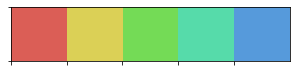

In [110]:
sns.palplot(sns.color_palette("hls", 7)[:5])

In [50]:
cont_col_dict = dict(zip(replication_rate_by_country["Continent"].unique(), sns.color_palette("hls", 7)[:5]))
replication_rate_by_country["Colour"] = replication_rate_by_country["Continent"].map(cont_col_dict)

### Add a row for the replication rate of the pooled data (based on the meta-analytic analyses)

In [51]:
pooled_data_row = pd.DataFrame(pd.Series(["Pooled", 15/16, "Pooled", sns.color_palette("hls", 7)[6]], index=replication_rate_by_country.columns)).transpose()

In [52]:
replication_rate_by_country = pd.concat([pooled_data_row, replication_rate_by_country]).reset_index(drop = True)

# Saving replication rate per country

In [53]:
replication_rate_by_country.to_csv("../output/replication_rate_by_country.csv", index=False)

# Adding whether a replication was successful to the long data and save the long data

In [54]:
long_data["Succesful Replication"] = country_deviations_signed_long["Succesful Replication"]
long_data.loc[long_data["Succesful Replication"].isna(), "Succesful Replication"] = "NA"
long_data.loc[long_data["Succesful Replication"]==1, "Succesful Replication"] = "Yes"
long_data.loc[long_data["Succesful Replication"]==0, "Succesful Replication"] = "No"
long_data["Sample Size"] = country_deviations_signed_long["Sample Size"]

In [55]:
long_data.head()

,Country,Item,Proportion,Succesful Replication,Sample Size
0,Australia,1,0.446809,No,282
1,Austria,1,0.198198,Yes,111
2,Belgium,1,0.192708,Yes,192
3,Bulgaria,1,0.181102,Yes,127
4,Chile,1,0.186207,Yes,145


In [56]:
long_data.to_csv("../output/proportions_by_country.csv", index=False)

# Checking the number of effects that are attenuated compared to the original study

In [57]:
n_attenuated_effects = (np.sign(country_deviations_signed_long["Deviation"])==-1).sum()
n_attenuated_effects

250

In [58]:
n_total_effects = country_deviations_signed_long.shape[0]
n_total_effects

323

In [59]:
n_attenuated_effects/n_total_effects

0.7739938080495357

In [60]:
n_larger_effects = n_total_effects - n_attenuated_effects
n_larger_effects

73

In [61]:
chisquare([n_larger_effects, n_attenuated_effects])

Power_divergenceResult(statistic=96.9938080495356, pvalue=6.954447526227529e-23)

### Attenuation is significantly more common than would be expected by chance. In other words, sampling variation alone cannot plausible account for the attenuation effect.